## The Battle of Neigborhoods Final Project

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
import json # library to handle JSON files
!pip install bs4
import bs4 as bs
import urllib.request

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

# geocoder
# !conda install -c conda-forge geocoder --yes 
# import geocoder

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


<b>1. Build the dataframe for the Toronto Neighbourhoods using BeautifulSoup.</b>

In [2]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find('table')
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)

In [3]:
df = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighbourhood"])
df.head(10)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,None
1,M2A,Not assigned,None
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,None
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


<b>1.1 Clean up the dataframe for the Toronto neighbourhood.</b>

In [4]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']
df

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge
11,M3B,North York,Don Mills
12,M4B,East York,Parkview Hill / Woodbine Gardens
13,M5B,Downtown Toronto,"Garden District, Ryerson"


<b>2. Build the dataframe for Toronto neighbourhood population</b>

In [5]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
skip_table = 1

# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find_all('table')[skip_table]
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    #print (tr)
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)

In [6]:
df1 = pd.DataFrame(l, columns=["Neighbourhood", "FM", "Census", "Population", "Land Area", "Density", "Population %", "Income", "Commuting", "Renters", "2nd Language", "2nd Language %"])

# clean up the data and dropping unwanted columns
df1 = df1[df1.Neighbourhood != 'Toronto CMA Average']
df1 = df1.drop('FM', 1)
df1 = df1.drop('Census', 1)
df1 = df1.drop('Renters', 1)

# change to the proper datatype
df1['Population'] = df1['Population'].str.replace(',','')
df1['Population'] = df1['Population'].apply(pd.to_numeric)
#print (df1.dtypes)

# display sample data
df1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese
2,Alderwood,11656,4.94,2360,-4.0,"35,239",8.8,Polish (6.2%),06.2% Polish
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",13.8,Cantonese (17.9%),17.9% Cantonese
4,Allenby,2513,0.58,4333,-1.0,"245,592",5.2,Russian (1.4%),01.4% Russian
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",16.4,Spanish (6.1%),06.1% Spanish
6,Armour Heights,4384,2.29,1914,2.0,"116,651",10.8,Russian (9.4%),09.4% Russian
7,Banbury,6641,2.72,2442,5.0,"92,319",6.1,Unspecified Chinese (5.1%),05.1% Unspecified Chinese
8,Bathurst Manor,14945,4.69,3187,12.3,"34,169",13.4,Russian (9.5%),09.5% Russian
9,Bay Street Corridor,4787,0.11,"43,518",3.0,"40,598",17.1,Mandarin (9.6%),09.6% Mandarin
10,Bayview Village,12280,4.14,"2,966",41.6,"46,752",14.4,Cantonese (8.4%),08.4% Cantonese


In [7]:
# get the data size
print('Size of df: ',df.shape)
print('Size of df1: ',df1.shape)

Size of df:  (103, 3)
Size of df1:  (174, 9)


In [8]:
df1['Latitude'] = ''
df1['Longitude'] = ''

# dummy values in case that geocoder is not working for the day
#df1['Latitude'] = 43.638093
#df1['Longitude'] = -79.4665843

<b>3. Find out the latitude and longitude for each neighbourhood.</b>

In [ ]:
# loop through the postal code to find out the latitude and longitude
for index, data in df1.iterrows():
    lat_lng_coords = None
    #print ('Now at PostalCode:', data['PostalCode'])
    #print ('Now at Neighbourhood:', data['Neighbourhood'])
    while(lat_lng_coords is None):
        #g = geocoder.google('{}, Toronto, Ontario'.format(data['PostalCode']))
        g = geocoder.google('{}, Toronto, Ontario'.format(data['Neighbourhood']))
        lat_lng_coords = g.latlng
    data['Latitude'] = lat_lng_coords[0]
    data['Longitude'] = lat_lng_coords[1]
    print ('Neighbourhood:', data['Neighbourhood'], 'Latitude:', data['Latitude'], 'Longitude:', data['Longitude'])
    
# loop through the postal code to find out the latitude and longitude
for index, data in df.iterrows():
    lat_lng_coords = None
    print ('Now at PostalCode:', data['PostalCode'])
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(data['PostalCode']))
        lat_lng_coords = g.latlng
    data['Latitude'] = lat_lng_coords[0]
    data['Longitude'] = lat_lng_coords[1]
    print ('PostalCode:', data['PostalCode'], 'Latitude:', data['Latitude'], 'Longitude:', data['Longitude'])

In [9]:
#Manually updating Neighborhoods just in case geocoder exceeds the daily limit
df1.loc[df1['Neighbourhood'] == 'Agincourt', ['Latitude','Longitude']] = 43.788009 ,-79.283882
df1.loc[df1['Neighbourhood'] == 'Alderwood', ['Latitude','Longitude']] = 43.6035413 ,-79.5464093
df1.loc[df1['Neighbourhood'] == 'Alexandra Park', ['Latitude','Longitude']] = 43.6497781 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Allenby', ['Latitude','Longitude']] = 43.7077457 ,-79.41271429999999
df1.loc[df1['Neighbourhood'] == 'Amesbury', ['Latitude','Longitude']] = 43.7010934 ,-79.48100649999999
df1.loc[df1['Neighbourhood'] == 'Armour Heights', ['Latitude','Longitude']] = 43.7453882 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Banbury', ['Latitude','Longitude']] = 43.7491152 ,-79.3663593
df1.loc[df1['Neighbourhood'] == 'Bathurst Manor', ['Latitude','Longitude']] = 43.7627405 ,-79.45632499999999
df1.loc[df1['Neighbourhood'] == 'Bay Street Corridor', ['Latitude','Longitude']] = 43.6567308 ,-79.3834603
df1.loc[df1['Neighbourhood'] == 'Bayview Village', ['Latitude','Longitude']] = 43.778243 ,-79.3827578
df1.loc[df1['Neighbourhood'] == 'Bayview Woods – Steeles', ['Latitude','Longitude']] = 43.7964111 ,-79.385975
df1.loc[df1['Neighbourhood'] == 'Bedford Park', ['Latitude','Longitude']] = 43.7301254 ,-79.4113072
df1.loc[df1['Neighbourhood'] == 'Bendale', ['Latitude','Longitude']] = 43.765434 ,-79.248935
df1.loc[df1['Neighbourhood'] == 'Birch Cliff', ['Latitude','Longitude']] = 43.6875 ,-79.269444
df1.loc[df1['Neighbourhood'] == 'Bloor West Village', ['Latitude','Longitude']] = 43.6508634 ,-79.477651
df1.loc[df1['Neighbourhood'] == 'Bracondale Hill', ['Latitude','Longitude']] = 43.678237 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Branson', ['Latitude','Longitude']] = 43.7764213 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Bridle Path', ['Latitude','Longitude']] = 43.7359565 ,-79.3692959
df1.loc[df1['Neighbourhood'] == 'Brockton', ['Latitude','Longitude']] = 43.6531909 ,-79.4380391
df1.loc[df1['Neighbourhood'] == 'Cabbagetown', ['Latitude','Longitude']] = 43.667263 ,-79.369169
df1.loc[df1['Neighbourhood'] == 'Caribou Park', ['Latitude','Longitude']] = 43.7182757 ,-79.4239707
df1.loc[df1['Neighbourhood'] == 'Carleton Village', ['Latitude','Longitude']] = 43.6716304 ,-79.4577314
df1.loc[df1['Neighbourhood'] == 'Casa Loma', ['Latitude','Longitude']] = 43.6780371 ,-79.4094439
df1.loc[df1['Neighbourhood'] == 'Centennial', ['Latitude','Longitude']] = 43.7841614 ,-79.1493545
df1.loc[df1['Neighbourhood'] == 'Chaplin Estates', ['Latitude','Longitude']] = 43.7019536 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Christie Pits', ['Latitude','Longitude']] = 43.6645888 ,-79.4206809
df1.loc[df1['Neighbourhood'] == 'Church and Wellesley', ['Latitude','Longitude']] = 43.6645421 ,-79.3817523
df1.loc[df1['Neighbourhood'] == 'Clairville', ['Latitude','Longitude']] = 43.7425044 ,-79.62213679999999
df1.loc[df1['Neighbourhood'] == 'Clairlea', ['Latitude','Longitude']] = 43.7184961 ,-79.2914268
df1.loc[df1['Neighbourhood'] == 'Cliffcrest', ['Latitude','Longitude']] = 43.724917 ,-79.22632899999999
df1.loc[df1['Neighbourhood'] == 'Cliffside', ['Latitude','Longitude']] = 43.712217 ,-79.244001
df1.loc[df1['Neighbourhood'] == 'Corktown', ['Latitude','Longitude']] = 43.654787 ,-79.359932
df1.loc[df1['Neighbourhood'] == 'Crescent Town', ['Latitude','Longitude']] = 43.6959813 ,-79.2937357
df1.loc[df1['Neighbourhood'] == 'Cricket Club', ['Latitude','Longitude']] = 43.7385478 ,-79.41271429999999
df1.loc[df1['Neighbourhood'] == 'Davenport', ['Latitude','Longitude']] = 43.6719082 ,-79.4352256
df1.loc[df1['Neighbourhood'] == 'Davisville', ['Latitude','Longitude']] = 43.70430899999999 ,-79.388516
df1.loc[df1['Neighbourhood'] == 'Deer Park', ['Latitude','Longitude']] = 43.6898373 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Discovery District', ['Latitude','Longitude']] = 43.6603242 ,-79.3937162
df1.loc[df1['Neighbourhood'] == 'Distillery District/West Don Lands', ['Latitude','Longitude']] = 43.6529534 ,-79.3570685
df1.loc[df1['Neighbourhood'] == 'Don Mills', ['Latitude','Longitude']] = 43.7448473 ,-79.34092299999999
df1.loc[df1['Neighbourhood'] == 'Don Valley Village', ['Latitude','Longitude']] = 43.7837792 ,-79.352188
df1.loc[df1['Neighbourhood'] == 'Dorset Park', ['Latitude','Longitude']] = 43.7540011 ,-79.28211739999999
df1.loc[df1['Neighbourhood'] == 'Dovercourt Park', ['Latitude','Longitude']] = 43.6658469 ,-79.4338188
df1.loc[df1['Neighbourhood'] == 'Downsview', ['Latitude','Longitude']] = 43.732256 ,-79.49338499999999
df1.loc[df1['Neighbourhood'] == 'Dufferin Grove', ['Latitude','Longitude']] = 43.6558326 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Earlscourt', ['Latitude','Longitude']] = 43.6769064 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'East Danforth', ['Latitude','Longitude']] = 43.6837565 ,-79.3212058
df1.loc[df1['Neighbourhood'] == 'Eatonville', ['Latitude','Longitude']] = 43.641448 ,-79.5547244
df1.loc[df1['Neighbourhood'] == 'Eglinton East', ['Latitude','Longitude']] = 43.7248346 ,-79.3051242
df1.loc[df1['Neighbourhood'] == 'Elia (Jane and Finch)', ['Latitude','Longitude']] = 43.7511187 ,-79.50975489999999
df1.loc[df1['Neighbourhood'] == 'Eringate', ['Latitude','Longitude']] = 43.66250369999999 ,-79.5772008
df1.loc[df1['Neighbourhood'] == 'Fairbank', ['Latitude','Longitude']] = 43.69640039999999 ,-79.45632499999999
df1.loc[df1['Neighbourhood'] == 'Fashion District', ['Latitude','Longitude']] = 43.644769 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Financial District', ['Latitude','Longitude']] = 43.64793479999999 ,-79.3817523
df1.loc[df1['Neighbourhood'] == 'Flemingdon Park', ['Latitude','Longitude']] = 43.720507 ,-79.33877799999999
df1.loc[df1['Neighbourhood'] == 'Forest Hill', ['Latitude','Longitude']] = 43.70431800000001 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Fort York/Liberty Village', ['Latitude','Longitude']] = 43.6388363 ,-79.4003053
df1.loc[df1['Neighbourhood'] == 'Garden District', ['Latitude','Longitude']] = 43.656898 ,-79.37612179999999
df1.loc[df1['Neighbourhood'] == 'Glen Park', ['Latitude','Longitude']] = 43.7101005 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Governor\'s Bridge/Bennington Heights', ['Latitude','Longitude']] = 43.693193 ,-79.37223809999999
df1.loc[df1['Neighbourhood'] == 'Grange Park', ['Latitude','Longitude']] = 43.6537341 ,-79.3930124
df1.loc[df1['Neighbourhood'] == 'Graydon Hall', ['Latitude','Longitude']] = 43.7616852 ,-79.34373939999999
df1.loc[df1['Neighbourhood'] == 'Guildwood', ['Latitude','Longitude']] = 43.752743 ,-79.19277699999999
df1.loc[df1['Neighbourhood'] == 'Harbord Village', ['Latitude','Longitude']] = 43.66190400000001 ,-79.4042712
df1.loc[df1['Neighbourhood'] == 'Harbourfront / CityPlace', ['Latitude','Longitude']] = 43.6416061 ,-79.3901975
df1.loc[df1['Neighbourhood'] == 'Harwood', ['Latitude','Longitude']] = 43.6758308 ,-79.4774195
df1.loc[df1['Neighbourhood'] == 'Henry Farm', ['Latitude','Longitude']] = 43.77178199999999 ,-79.352086
df1.loc[df1['Neighbourhood'] == 'High Park North', ['Latitude','Longitude']] = 43.6594968 ,-79.467576
df1.loc[df1['Neighbourhood'] == 'Highland Creek', ['Latitude','Longitude']] = 43.78658 ,-79.18829199999999
df1.loc[df1['Neighbourhood'] == 'Hillcrest', ['Latitude','Longitude']] = 43.678237 ,-79.4267845
df1.loc[df1['Neighbourhood'] == 'Hoggs Hollow', ['Latitude','Longitude']] = 43.7419701 ,-79.398642
df1.loc[df1['Neighbourhood'] == 'Humber Bay Shores', ['Latitude','Longitude']] = 43.6259939 ,-79.4774195
df1.loc[df1['Neighbourhood'] == 'Humber Heights', ['Latitude','Longitude']] = 43.6963578 ,-79.527033
df1.loc[df1['Neighbourhood'] == 'Humber Summit', ['Latitude','Longitude']] = 43.7601003 ,-79.5717846
df1.loc[df1['Neighbourhood'] == 'Humber Valley Village', ['Latitude','Longitude']] = 43.667113 ,-79.527974
df1.loc[df1['Neighbourhood'] == 'Humberlea', ['Latitude','Longitude']] = 43.721319 ,-79.5332169
df1.loc[df1['Neighbourhood'] == 'Humbermede', ['Latitude','Longitude']] = 43.7421301 ,-79.5406738
df1.loc[df1['Neighbourhood'] == 'Humberwood', ['Latitude','Longitude']] = 43.7256585 ,-79.619329
df1.loc[df1['Neighbourhood'] == 'Humewood–Cedarvale', ['Latitude','Longitude']] = 43.6937813 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Ionview', ['Latitude','Longitude']] = 43.730824 ,-79.2739
df1.loc[df1['Neighbourhood'] == 'Islington – Six Points', ['Latitude','Longitude']] = 43.6467566 ,-79.53505299999999
df1.loc[df1['Neighbourhood'] == 'Junction Triangle', ['Latitude','Longitude']] = 43.6613564 ,-79.4492924
df1.loc[df1['Neighbourhood'] == 'Kensington Market', ['Latitude','Longitude']] = 43.6545236 ,-79.4014566
df1.loc[df1['Neighbourhood'] == 'Kingsview Village', ['Latitude','Longitude']] = 43.7005039 ,-79.5519144
df1.loc[df1['Neighbourhood'] == 'Lambton', ['Latitude','Longitude']] = 43.6673705 ,-79.5013207
df1.loc[df1['Neighbourhood'] == 'L\'Amoreaux', ['Latitude','Longitude']] = 43.796 ,-79.309
df1.loc[df1['Neighbourhood'] == 'Lansing', ['Latitude','Longitude']] = 43.7595964 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Lawrence Heights', ['Latitude','Longitude']] = 43.72277400000001 ,-79.45092799999999
df1.loc[df1['Neighbourhood'] == 'Lawrence Manor', ['Latitude','Longitude']] = 43.7280111 ,-79.4394459
df1.loc[df1['Neighbourhood'] == 'Lawrence Park', ['Latitude','Longitude']] = 43.7232822 ,-79.3887901
df1.loc[df1['Neighbourhood'] == 'Leaside', ['Latitude','Longitude']] = 43.70882599999999 ,-79.373499
df1.loc[df1['Neighbourhood'] == 'Ledbury Park', ['Latitude','Longitude']] = 43.731176 ,-79.4225637
df1.loc[df1['Neighbourhood'] == 'Leslieville', ['Latitude','Longitude']] = 43.6658467 ,-79.33247329999999
df1.loc[df1['Neighbourhood'] == 'Little Italy', ['Latitude','Longitude']] = 43.6547828 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Little Portugal', ['Latitude','Longitude']] = 43.6463408 ,-79.4281914
df1.loc[df1['Neighbourhood'] == 'Long Branch', ['Latitude','Longitude']] = 43.593421 ,-79.538164
df1.loc[df1['Neighbourhood'] == 'Lytton Park', ['Latitude','Longitude']] = 43.7159091 ,-79.4113072
df1.loc[df1['Neighbourhood'] == 'Malvern', ['Latitude','Longitude']] = 43.80916 ,-79.22169
df1.loc[df1['Neighbourhood'] == 'Maple Leaf', ['Latitude','Longitude']] = 43.7137562 ,-79.49007379999999
df1.loc[df1['Neighbourhood'] == 'Markland Wood', ['Latitude','Longitude']] = 43.632036 ,-79.57513999999999
df1.loc[df1['Neighbourhood'] == 'Maryvale', ['Latitude','Longitude']] = 43.762575 ,-79.314767
df1.loc[df1['Neighbourhood'] == 'Milliken', ['Latitude','Longitude']] = 43.8237331 ,-79.3070855
df1.loc[df1['Neighbourhood'] == 'Mimico', ['Latitude','Longitude']] = 43.614627 ,-79.4956974
df1.loc[df1['Neighbourhood'] == 'Moore Park', ['Latitude','Longitude']] = 43.6913089 ,-79.383686
df1.loc[df1['Neighbourhood'] == 'Morningside', ['Latitude','Longitude']] = 43.787 ,-79.206
df1.loc[df1['Neighbourhood'] == 'Mount Dennis', ['Latitude','Longitude']] = 43.687076 ,-79.48983299999999
df1.loc[df1['Neighbourhood'] == 'New Toronto', ['Latitude','Longitude']] = 43.6007776 ,-79.505257
df1.loc[df1['Neighbourhood'] == 'Newtonbrook', ['Latitude','Longitude']] = 43.790104 ,-79.4197497
df1.loc[df1['Neighbourhood'] == 'Niagara', ['Latitude','Longitude']] = 43.6373829 ,-79.40849279999999
df1.loc[df1['Neighbourhood'] == 'North York City Centre', ['Latitude','Longitude']] = 43.76830349999999 ,-79.4133325
df1.loc[df1['Neighbourhood'] == 'Oakridge', ['Latitude','Longitude']] = 43.696632 ,-79.282859
df1.loc[df1['Neighbourhood'] == 'O\'Connor–Parkview', ['Latitude','Longitude']] = 43.7063972 ,-79.30993699999999
df1.loc[df1['Neighbourhood'] == 'Old East York', ['Latitude','Longitude']] = 43.6964049 ,-79.3296565
df1.loc[df1['Neighbourhood'] == 'Old Mill/Baby Point', ['Latitude','Longitude']] = 43.6581547 ,-79.4914798
df1.loc[df1['Neighbourhood'] == 'Parkdale', ['Latitude','Longitude']] = 43.643832 ,-79.442534
df1.loc[df1['Neighbourhood'] == 'Parkway Forest', ['Latitude','Longitude']] = 43.7722041 ,-79.34233119999999
df1.loc[df1['Neighbourhood'] == 'Parkwoods', ['Latitude','Longitude']] = 43.7553609 ,-79.3268397
df1.loc[df1['Neighbourhood'] == 'Pelmo Park', ['Latitude','Longitude']] = 43.7121365 ,-79.5238103
df1.loc[df1['Neighbourhood'] == 'Playter Estates', ['Latitude','Longitude']] = 43.6790323 ,-79.359228
df1.loc[df1['Neighbourhood'] == 'Pleasant View', ['Latitude','Longitude']] = 43.7848218 ,-79.3381065
df1.loc[df1['Neighbourhood'] == 'Port Lands', ['Latitude','Longitude']] = 43.6473987 ,-79.3381065
df1.loc[df1['Neighbourhood'] == 'Port Union', ['Latitude','Longitude']] = 43.7834548 ,-79.149209
df1.loc[df1['Neighbourhood'] == 'Princess Gardens', ['Latitude','Longitude']] = 43.6688924 ,-79.5434841
df1.loc[df1['Neighbourhood'] == 'Regal Heights', ['Latitude','Longitude']] = 43.676652 ,-79.4352256
df1.loc[df1['Neighbourhood'] == 'Regent Park/Trefann Court', ['Latitude','Longitude']] = 43.6574889 ,-79.360284
df1.loc[df1['Neighbourhood'] == 'Richview', ['Latitude','Longitude']] = 43.6878699 ,-79.5434841
df1.loc[df1['Neighbourhood'] == 'Riverdale', ['Latitude','Longitude']] = 43.669714 ,-79.353185
df1.loc[df1['Neighbourhood'] == 'Rockcliffe–Smythe', ['Latitude','Longitude']] = 43.6742272 ,-79.49850909999999
df1.loc[df1['Neighbourhood'] == 'Roncesvalles', ['Latitude','Longitude']] = 43.6484365 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Rosedale', ['Latitude','Longitude']] = 43.683375 ,-79.377172
df1.loc[df1['Neighbourhood'] == 'Rouge', ['Latitude','Longitude']] = 43.804929 ,-79.165842
df1.loc[df1['Neighbourhood'] == 'Rouge Hill', ['Latitude','Longitude']] = 43.794719 ,-79.134478
df1.loc[df1['Neighbourhood'] == 'Runnymede', ['Latitude','Longitude']] = 43.66173240000001 ,-79.4849101
df1.loc[df1['Neighbourhood'] == 'Scarborough Junction', ['Latitude','Longitude']] = 43.71666700000001 ,-79.259722
df1.loc[df1['Neighbourhood'] == 'Scarborough City Centre', ['Latitude','Longitude']] = 43.7762792 ,-79.2529857
df1.loc[df1['Neighbourhood'] == 'Scarborough Village', ['Latitude','Longitude']] = 43.740615 ,-79.208887
df1.loc[df1['Neighbourhood'] == 'Seaton Village', ['Latitude','Longitude']] = 43.669017 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Silverthorn', ['Latitude','Longitude']] = 43.6879613 ,-79.467576
df1.loc[df1['Neighbourhood'] == 'Smithfield', ['Latitude','Longitude']] = 43.7394164 ,-79.58843689999999
df1.loc[df1['Neighbourhood'] == 'South Hill', ['Latitude','Longitude']] = 43.6821959 ,-79.4056784
df1.loc[df1['Neighbourhood'] == 'St. James Town', ['Latitude','Longitude']] = 43.6708666 ,-79.37330639999999
df1.loc[df1['Neighbourhood'] == 'Steeles', ['Latitude','Longitude']] = 43.8155519 ,-79.3107689
df1.loc[df1['Neighbourhood'] == 'Summerhill', ['Latitude','Longitude']] = 43.6811436 ,-79.3944199
df1.loc[df1['Neighbourhood'] == 'Sunnylea', ['Latitude','Longitude']] = 43.6399324 ,-79.5125662
df1.loc[df1['Neighbourhood'] == 'Swansea', ['Latitude','Longitude']] = 43.6439713 ,-79.47799069999999
df1.loc[df1['Neighbourhood'] == 'Tam O\'Shanter – Sullivan', ['Latitude','Longitude']] = 43.788056 ,-79.301389
df1.loc[df1['Neighbourhood'] == 'The Annex', ['Latitude','Longitude']] = 43.6698329 ,-79.407585
df1.loc[df1['Neighbourhood'] == 'The Beaches', ['Latitude','Longitude']] = 43.6673479 ,-79.29669299999999
df1.loc[df1['Neighbourhood'] == 'The Danforth', ['Latitude','Longitude']] = 43.6837565 ,-79.3212058
df1.loc[df1['Neighbourhood'] == 'The Elms', ['Latitude','Longitude']] = 43.7236919 ,-79.5462943
df1.loc[df1['Neighbourhood'] == 'The Junction', ['Latitude','Longitude']] = 43.666612 ,-79.468614
df1.loc[df1['Neighbourhood'] == 'The Kingsway', ['Latitude','Longitude']] = 43.652674 ,-79.507194
df1.loc[df1['Neighbourhood'] == 'The Queensway', ['Latitude','Longitude']] = 43.6254023 ,-79.5068881
df1.loc[df1['Neighbourhood'] == 'Thistletown', ['Latitude','Longitude']] = 43.73717449999999 ,-79.5652707
df1.loc[df1['Neighbourhood'] == 'Thorncliffe Park', ['Latitude','Longitude']] = 43.7080032 ,-79.352188
df1.loc[df1['Neighbourhood'] == 'Toronto Islands', ['Latitude','Longitude']] = 43.621413 ,-79.3788412
df1.loc[df1['Neighbourhood'] == 'Trinity–Bellwoods', ['Latitude','Longitude']] = 43.6500371 ,-79.4169356
df1.loc[df1['Neighbourhood'] == 'Upper Beaches', ['Latitude','Longitude']] = 43.6779526 ,-79.30993699999999
df1.loc[df1['Neighbourhood'] == 'Victoria Village', ['Latitude','Longitude']] = 43.7357352 ,-79.3124184
df1.loc[df1['Neighbourhood'] == 'Wallace Emerson', ['Latitude','Longitude']] = 43.6684011 ,-79.4405951
df1.loc[df1['Neighbourhood'] == 'West Deane Park', ['Latitude','Longitude']] = 43.6635853 ,-79.5631537
df1.loc[df1['Neighbourhood'] == 'West Hill', ['Latitude','Longitude']] = 43.769163 ,-79.182803
df1.loc[df1['Neighbourhood'] == 'West Rouge', ['Latitude','Longitude']] = 43.794719 ,-79.134478
df1.loc[df1['Neighbourhood'] == 'Westminster', ['Latitude','Longitude']] = 43.7764213 ,-79.4506989
df1.loc[df1['Neighbourhood'] == 'Westmount', ['Latitude','Longitude']] = 43.6871106 ,-79.52240479999999
df1.loc[df1['Neighbourhood'] == 'Weston', ['Latitude','Longitude']] = 43.7002318 ,-79.51507810000001
df1.loc[df1['Neighbourhood'] == 'Wexford', ['Latitude','Longitude']] = 43.74320789999999 ,-79.3046444
df1.loc[df1['Neighbourhood'] == 'Willowdale', ['Latitude','Longitude']] = 43.7711708 ,-79.4197497
df1.loc[df1['Neighbourhood'] == 'Wilson Heights', ['Latitude','Longitude']] = 43.74069799999999 ,-79.438824
df1.loc[df1['Neighbourhood'] == 'Woburn', ['Latitude','Longitude']] = 43.767528 ,-79.21772100000001
df1.loc[df1['Neighbourhood'] == 'Wychwood', ['Latitude','Longitude']] = 43.6779102 ,-79.4201015
df1.loc[df1['Neighbourhood'] == 'York Mills', ['Latitude','Longitude']] = 43.7501272 ,-79.39723459999999
df1.loc[df1['Neighbourhood'] == 'York University Heights', ['Latitude','Longitude']] = 43.7679803 ,-79.4872619
df1.loc[df1['Neighbourhood'] == 'Yorkville', ['Latitude','Longitude']] = 43.670749 ,-79.39304

<b>3.1 Print out the updated dataframe.</b>

In [10]:
# print out the updated dataframe
df1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.788,-79.2839
2,Alderwood,11656,4.94,2360,-4.0,"35,239",8.8,Polish (6.2%),06.2% Polish,43.6035,-79.5464
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",13.8,Cantonese (17.9%),17.9% Cantonese,43.6498,-79.4015
4,Allenby,2513,0.58,4333,-1.0,"245,592",5.2,Russian (1.4%),01.4% Russian,43.7077,-79.4127
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",16.4,Spanish (6.1%),06.1% Spanish,43.7011,-79.481
6,Armour Heights,4384,2.29,1914,2.0,"116,651",10.8,Russian (9.4%),09.4% Russian,43.7454,-79.4226
7,Banbury,6641,2.72,2442,5.0,"92,319",6.1,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,43.7491,-79.3664
8,Bathurst Manor,14945,4.69,3187,12.3,"34,169",13.4,Russian (9.5%),09.5% Russian,43.7627,-79.4563
9,Bay Street Corridor,4787,0.11,"43,518",3.0,"40,598",17.1,Mandarin (9.6%),09.6% Mandarin,43.6567,-79.3835
10,Bayview Village,12280,4.14,"2,966",41.6,"46,752",14.4,Cantonese (8.4%),08.4% Cantonese,43.7782,-79.3828


<b>3.2 Double check on the data quality of the dataframe.</b>

In [11]:
# double check on the dataframe
print('The dataframe has {} neighborhoods.'.format(
        len(df1['Neighbourhood'].unique()),
        df1.shape[0]
    )
)

The dataframe has 174 neighborhoods.


<b>3.3 Add the population weightage for each neighbourhood.</b>

In [12]:
total_population = df1['Population'].sum()
#print (total_population)

# the higher populated neighbourhood will have the higher score
df1['Population Score'] = df1['Population']/total_population*100

# sort the dataframe based on the descending population score
df1 = df1.sort_values('Population Score', ascending=False)
df1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score
113,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626
170,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928
50,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065
86,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.796,-79.309,1.898439
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.788,-79.2839,1.845247
98,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.8092,-79.2217,1.834774
168,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.7712,-79.4197,1.785929
44,Downsview,36613,16.13,2270,-5.0,"26,751",14.4,Italian (11.7%),11.7% Italian,43.7323,-79.4934,1.515581
108,Newtonbrook,36046,8.77,4110,0.3,"33,428",16.6,Russian (8.8%),08.8% Russian,43.7901,-79.4197,1.492110
139,Smithfield,34996,6.45,5426,-7.2,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.7394,-79.5884,1.448645


<b>3.4 Display the top 10 populated neighbourhood in the barchart.</b>

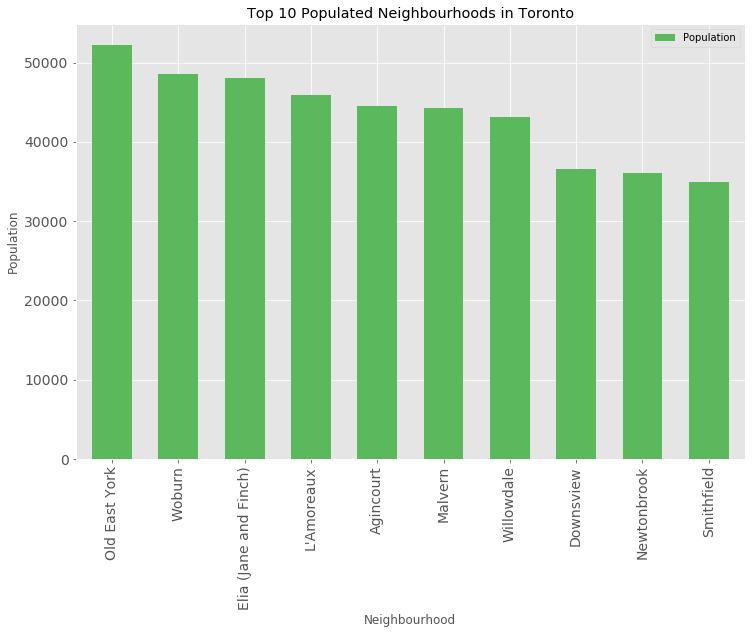

In [13]:
population_chart = df1[['Neighbourhood', 'Population']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 10 Populated Neighbourhoods in Toronto') # add title to the plot

plt.show()

<b>4. Segmenting and clustering in Toronto.</b>

In [14]:
# Use geopy library to get the latitude and longitude values of Toronto Ontario
address = 'Toronto Ontario, TO'
toronto_data = df1
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Ontario are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Toronto Ontario are 43.6534817, -79.3839347.


<b>4.1 - create the map of the Toronto Ontario and mark the neighbourhoods.</b>

In [15]:
# create map of Toronto Ontario using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  

map_to

<b>5. Adopting the Foursquare API to find out the venue category.</b>

In [16]:
# Foursquare Credentials
CLIENT_ID = 'NF0NV1WBYI4TIY5RJSBMQZU3ULJAGCO0LE0QKQWNEDVZJDU3' # your Foursquare ID
CLIENT_SECRET = '5O31BNOOQQSKR2TMRYA1JABZDMDZBTDTQLVP4LUIVYSNMKP2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: NF0NV1WBYI4TIY5RJSBMQZU3ULJAGCO0LE0QKQWNEDVZJDU3
CLIENT_SECRET:5O31BNOOQQSKR2TMRYA1JABZDMDZBTDTQLVP4LUIVYSNMKP2


<b>5.1 Explore the first neighborhood in the dataframe.</b>

In [17]:
# explore the first neighborhood in our dataframe.
toronto_data.loc[1, 'Neighbourhood']
toronto_data.head(1)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score
113,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626


In [18]:
neighborhood_latitude = toronto_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[1, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Agincourt are 43.788009, -79.283882.


<b>5.2 Explore the top venues from Foursquare API of radius of 500M.</b>

In [19]:
# explore the top 100 venues
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NF0NV1WBYI4TIY5RJSBMQZU3ULJAGCO0LE0QKQWNEDVZJDU3&client_secret=5O31BNOOQQSKR2TMRYA1JABZDMDZBTDTQLVP4LUIVYSNMKP2&v=20180605&ll=43.788009,-79.283882&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea5e11c71c428001f33ce12'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Agincourt',
  'headerFullLocation': 'Agincourt, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.792509004500005,
    'lng': -79.2776601258366},
   'sw': {'lat': 43.7835089955, 'lng': -79.2901038741634}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5058e50ce4b0a3bd556ccbdf',
       'name': 'Tim Hortons',
       'location': {'address': '4200 Sheppard Ave East',
        'crossStreet': 'Midland Ave',
        'lat': 43.78563681034057,
        'lng': -79.27921459078789,


In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Tim Hortons,Coffee Shop,43.785637,-79.279215
1,Midland Court,Food Court,43.786768,-79.278888


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [24]:
# Explore Neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<b>5.3 Get nearby venues for Toronto neighbourhoods.</b>

In [25]:
# get scarborough venues
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

print(toronto_venues.shape)
toronto_venues.head(10)

Old East York
Woburn
Elia (Jane and Finch)
L'Amoreaux
Agincourt
Malvern
Willowdale
Downsview
Newtonbrook
Smithfield
Fairbank
Riverdale
Don Valley Village
Bendale
Parkdale
Humewood–Cedarvale
Tam O'Shanter – Sullivan
Parkwoods
Milliken
York University Heights
Richview
Scarborough Junction
West Hill
Steeles
Forest Hill
Davisville
Leslieville
High Park North
Rouge
Eglinton East
East Danforth
Don Mills
Flemingdon Park
Mount Dennis
The Beaches
Maple Leaf
Upper Beaches
Eatonville
Glen Park
Hillcrest
Thorncliffe Park
Wexford
Silverthorn
O'Connor–Parkview
Sunnylea
York Mills
Amesbury
Earlscourt
Victoria Village
Thistletown
Pleasant View
Islington – Six Points
Weston
Scarborough City Centre
Westminster
Kingsview Village
Roncesvalles
The Annex
Deer Park
Bathurst Manor
Humbermede
St. James Town
Cliffcrest
Humber Valley Village
Harbourfront / CityPlace
Mimico
Dorset Park
Leaside
Lawrence Manor
Bedford Park
Wilson Heights
Church and Wellesley
Oakridge
Bayview Woods – Steeles
Ionview
Highland Creek
G

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old East York,43.696405,-79.329656,Mon K Patisserie,43.696922,-79.329520,Pastry Shop
1,Old East York,43.696405,-79.329656,Knuckle Sandwich,43.696194,-79.328749,Sandwich Place
2,Old East York,43.696405,-79.329656,LCBO,43.696728,-79.328875,Liquor Store
3,Old East York,43.696405,-79.329656,Little Coxwell Restaurant,43.696180,-79.328958,Thai Restaurant
4,Old East York,43.696405,-79.329656,Lickadee Split,43.696096,-79.328721,Ice Cream Shop
5,Old East York,43.696405,-79.329656,Remarks Bar & Grill,43.696726,-79.329219,Pub
6,Old East York,43.696405,-79.329656,Pizza Hut,43.696383,-79.328778,Pizza Place
7,Old East York,43.696405,-79.329656,Starbucks,43.696080,-79.329030,Coffee Shop
8,Old East York,43.696405,-79.329656,Thai Fusion,43.696136,-79.328741,Thai Restaurant
9,Old East York,43.696405,-79.329656,Mr.Sub,43.697277,-79.329678,Restaurant


<b>5.4 Find out how many unique categories in the result.</b>

In [26]:
# find out how many unique categories
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,2,2,2,2,2,2
Alderwood,9,9,9,9,9,9
Alexandra Park,100,100,100,100,100,100
Allenby,24,24,24,24,24,24
Amesbury,5,5,5,5,5,5
Armour Heights,1,1,1,1,1,1
Banbury,2,2,2,2,2,2
Bathurst Manor,4,4,4,4,4,4
Bay Street Corridor,80,80,80,80,80,80


In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 308 uniques categories.


<b>5.5 Analyzing each neighborhood now in Toronto.</b>

In [28]:
# analyze each neighborhood

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorsports Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailo

In [29]:
toronto_onehot.shape

(3314, 309)

<b>5.6 Group the rows together based on the mean of the frequency of occurrence of each category.</b>

In [30]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head(10)

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorsports Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailo

In [31]:
toronto_grouped.shape

(171, 309)

<b>5.7 Find out the top 10 most common venues in the neighbourhood.</b>

In [32]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    #print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [33]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
toronto_grouped.shape[0]
toronto_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorsports Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailo

<b>5.8 Explore the top 8 venues for each neighborhood.</b>

In [35]:
# create the new dataframe and display the top 8 venues for each neighborhood.
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Agincourt,Coffee Shop,Food Court,Yoga Studio,Food,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
1,Alderwood,Pizza Place,Pub,Coffee Shop,Donut Shop,Pharmacy,Skating Rink,Gym,Convenience Store
2,Alexandra Park,Bar,Café,Furniture / Home Store,Yoga Studio,Vegetarian / Vegan Restaurant,Coffee Shop,Caribbean Restaurant,French Restaurant
3,Allenby,Sushi Restaurant,Coffee Shop,Deli / Bodega,Gym,Italian Restaurant,Gastropub,Liquor Store,Lingerie Store
4,Amesbury,Portuguese Restaurant,Restaurant,Fast Food Restaurant,Bakery,Park,Dessert Shop,Flower Shop,Deli / Bodega
5,Armour Heights,Wine Shop,Yoga Studio,Food,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
6,Banbury,Park,Soccer Field,Yoga Studio,Falafel Restaurant,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
7,Bathurst Manor,Park,Convenience Store,Playground,Baseball Field,Yoga Studio,Flower Shop,Fast Food Restaurant,Field
8,Bay Street Corridor,Coffee Shop,Sandwich Place,Clothing Store,Hotel,Fried Chicken Joint,Ramen Restaurant,Bubble Tea Shop,Café
9,Bayview Village,Flower Shop,Gas Station,Trail,Yoga Studio,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop


<b>5.9 Add the venue weighted score for each neighbourhood.</b>

In [36]:
neighborhoods_venues_sorted['Venue Score'] = 0
venue = 'Park'
venue_count = 0

# award the score based on the common findings
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'].str.contains(venue), ['Venue Score']] = 1.0
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['2nd Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.9
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['3rd Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.8
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['4th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.7
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['5th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.6
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['6th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.5
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['7th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.4
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['8th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.3

# merge the two dataframes
merged_data = pd.merge(df1, neighborhoods_venues_sorted, on='Neighbourhood')

# clean up the merged dataset
merged_data = merged_data.drop('1st Most Common Venue', 1)
merged_data = merged_data.drop('2nd Most Common Venue', 1)
merged_data = merged_data.drop('3rd Most Common Venue', 1)
merged_data = merged_data.drop('4th Most Common Venue', 1)
merged_data = merged_data.drop('5th Most Common Venue', 1)
merged_data = merged_data.drop('6th Most Common Venue', 1)
merged_data = merged_data.drop('7th Most Common Venue', 1)
merged_data = merged_data.drop('8th Most Common Venue', 1)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Venue Score', 1)

merged_data.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626,0.4
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928,1.0
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065,0.7
3,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.796,-79.309,1.898439,0.0
4,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.788,-79.2839,1.845247,0.0
5,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.8092,-79.2217,1.834774,0.4
6,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.7712,-79.4197,1.785929,0.8
7,Downsview,36613,16.13,2270,-5.0,"26,751",14.4,Italian (11.7%),11.7% Italian,43.7323,-79.4934,1.515581,0.0
8,Newtonbrook,36046,8.77,4110,0.3,"33,428",16.6,Russian (8.8%),08.8% Russian,43.7901,-79.4197,1.492110,0.0
9,Smithfield,34996,6.45,5426,-7.2,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.7394,-79.5884,1.448645,0.0


<b>5.10 Calculate the total weighted score for each neighbourhood.</b>

In [37]:
# considering this to be a fair weightage on both parameters
population_weight = 0.5
venue_weight = 0.5

# calculate the total score
merged_data['Total Score'] = (merged_data['Population Score']*population_weight) + (merged_data['Venue Score']*venue_weight)

# sort the dataframe based on the descending total score
merged_data = merged_data.sort_values('Total Score', ascending=False)

<b>6. Cluster the neighbourhoods using K-Clustering.</b>

In [38]:
# set number of clusters
kclusters = 5

#toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# clean up data further
toronto_grouped_clustering = merged_data.drop('Neighbourhood', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('Income', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('Density', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('2nd Language', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('2nd Language %', 1)

toronto_grouped_clustering.head(10)

,Population,Land Area,Population %,Commuting,Latitude,Longitude,Population Score,Venue Score,Total Score
1,48507,13.34,-1.5,13.3,43.7675,-79.2177,2.007928,1.0,1.503964
2,48003,7.66,-10.0,13.0,43.7511,-79.5098,1.987065,0.7,1.343533
6,43144,7.68,62.3,15.6,43.7712,-79.4197,1.785929,0.8,1.292964
0,52220,7.94,-4.6,22.0,43.6964,-79.3297,2.161626,0.4,1.280813
5,44324,8.86,1.5,13.6,43.8092,-79.2217,1.834774,0.4,1.117387
22,24696,4.52,1.9,10.5,43.8156,-79.3108,1.022281,1.0,1.011141
20,25780,7.41,-3.6,18.2,43.7167,-79.2597,1.067153,0.9,0.983576
26,22746,2.18,-1.6,27.5,43.6595,-79.4676,0.941562,1.0,0.970781
27,22724,28.72,175.0,12.1,43.8049,-79.1658,0.940651,1.0,0.970325
3,45862,7.15,0.9,13.4,43.796,-79.309,1.898439,0.0,0.949220


In [39]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 4, 4, 1, 1, 2], dtype=int32)

<b>6.1 Clean up the data for clustering.</b>

In [40]:
# empty the invalid data
#merged_data['Neighbourhood'] = neighborhoods_venues_sorted['Neighbourhood']
#print(toronto_data.shape)
merged_data.isnull().sum()
merged_data.dropna(how = 'any', axis = 0, inplace = True)
print(merged_data.shape)
print(neighborhoods_venues_sorted.shape)

(171, 14)
(171, 9)


In [41]:
merged_data.head()

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928,1.0,1.503964
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065,0.7,1.343533
6,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.7712,-79.4197,1.785929,0.8,1.292964
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626,0.4,1.280813
5,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.8092,-79.2217,1.834774,0.4,1.117387


In [42]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Venue Score', 1)
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Agincourt,Coffee Shop,Food Court,Yoga Studio,Food,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
1,Alderwood,Pizza Place,Pub,Coffee Shop,Donut Shop,Pharmacy,Skating Rink,Gym,Convenience Store
2,Alexandra Park,Bar,Café,Furniture / Home Store,Yoga Studio,Vegetarian / Vegan Restaurant,Coffee Shop,Caribbean Restaurant,French Restaurant
3,Allenby,Sushi Restaurant,Coffee Shop,Deli / Bodega,Gym,Italian Restaurant,Gastropub,Liquor Store,Lingerie Store
4,Amesbury,Portuguese Restaurant,Restaurant,Fast Food Restaurant,Bakery,Park,Dessert Shop,Flower Shop,Deli / Bodega


In [43]:
toronto_merged = toronto_data

# add clustering labels
merged_data['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = merged_data.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928,1.0,1.503964,2,Park,Coffee Shop,Business Service,Korean Restaurant,Flower Shop,Field,Filipino Restaurant,Fish & Chips Shop
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065,0.7,1.343533,2,Pool,Soccer Field,Plaza,Park,Yoga Studio,Flea Market,Fast Food Restaurant,Field
6,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.7712,-79.4197,1.785929,0.8,1.292964,2,Chinese Restaurant,Sushi Restaurant,Park,Pet Store,Flea Market,Fast Food Restaurant,Field,Filipino Restaurant
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626,0.4,1.280813,2,Thai Restaurant,Ice Cream Shop,Restaurant,Liquor Store,Bus Line,Sandwich Place,Park,Pastry Shop
5,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.8092,-79.2217,1.834774,0.4,1.117387,2,Pharmacy,Fast Food Restaurant,Pizza Place,Restaurant,Grocery Store,Gym / Fitness Center,Park,Sandwich Place


<b>6.2 Draw the cluster map.</b>

In [44]:
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>7. Evaluate the final result.</b>

In [45]:
# display the top 5 neighbourhoods
target = merged_data.head(5)
target.head()
#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0].count()

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928,1.0,1.503964,2
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065,0.7,1.343533,2
6,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.7712,-79.4197,1.785929,0.8,1.292964,2
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626,0.4,1.280813,2
5,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.8092,-79.2217,1.834774,0.4,1.117387,2


### Cluster 1 

In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
113,Garden District,8240,"37,614",17.0,Unspecified Chinese (3.0%),03.0% Unspecified Chinese,43.6569,-79.3761,0.341092,0.0,0.170546,0,Restaurant,Hotel,Coffee Shop,Clothing Store,Japanese Restaurant,Tea Room,Theater,Café
114,Crescent Town,8157,"23,021",24.5,Bengali (18.1%),18.1% Bengali,43.696,-79.2937,0.337656,0.9,0.618828,0,Metro Station,Park,Convenience Store,Golf Course,Food,Field,Filipino Restaurant,Fish & Chips Shop
115,Branson,8017,"27,156",18.0,Russian (24.1%),24.1% Russian,43.7764,-79.4507,0.331861,0.9,0.615930,0,Skating Rink,Park,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
116,Eringate,8008,"34,789",10.9,Portuguese (3.4%),03.4% Portuguese,43.6625,-79.5772,0.331488,0.9,0.615744,0,Chinese Restaurant,Park,Convenience Store,Eastern European Restaurant,Pizza Place,Flower Shop,Field,Filipino Restaurant
117,Little Italy,7917,"31,231",15.5,Portuguese (17.4%),17.4% Portuguese,43.6548,-79.4169,0.327721,0.0,0.163861,0,Italian Restaurant,Bar,Sandwich Place,Café,American Restaurant,Clothing Store,Breakfast Spot,Pub


### Cluster 2 

In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
23,Forest Hill,24056,"101,631",14.8,Russian (2.4%),02.4% Russian,43.7043,-79.4268,0.995789,0.0,0.497894,1,Pizza Place,Bagel Shop,Grocery Store,Optical Shop,Coffee Shop,Frozen Yogurt Shop,Middle Eastern Restaurant,Spa
24,Davisville,23727,"55,735",26.0,Persian (1.5%),01.5% Persian,43.7043,-79.3885,0.982170,0.0,0.491085,1,Pizza Place,Sandwich Place,Dessert Shop,Sushi Restaurant,Gym,Café,Coffee Shop,Italian Restaurant
25,Leslieville,23567,"30,886",19.9,Cantonese (9.4%),09.4% Cantonese,43.6658,-79.3325,0.975547,0.5,0.737773,1,Pizza Place,Bakery,Arts & Crafts Store,Diner,Bar,Park,Sushi Restaurant,Coffee Shop
26,High Park North,22746,"46,437",27.5,Polish (3.0%),03.0% Polish,43.6595,-79.4676,0.941562,1.0,0.970781,1,Park,Baseball Field,Italian Restaurant,Residential Building (Apartment / Condo),Café,Gym / Fitness Center,Flea Market,Farmers Market
27,Rouge,22724,"29,230",12.1,Tamil (15.6%),15.6% Tamil,43.8049,-79.1658,0.940651,1.0,0.970325,1,Park,Fast Food Restaurant,Flower Shop,Farmers Market,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


### Cluster 3

In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Old East York,52220,"33,172",22.0,Greek (4.3%),04.3% Greek,43.6964,-79.3297,2.161626,0.4,1.280813,2,Thai Restaurant,Ice Cream Shop,Restaurant,Liquor Store,Bus Line,Sandwich Place,Park,Pastry Shop
1,Woburn,48507,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.7675,-79.2177,2.007928,1.0,1.503964,2,Park,Coffee Shop,Business Service,Korean Restaurant,Flower Shop,Field,Filipino Restaurant,Fish & Chips Shop
2,Elia (Jane and Finch),48003,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.7511,-79.5098,1.987065,0.7,1.343533,2,Pool,Soccer Field,Plaza,Park,Yoga Studio,Flea Market,Fast Food Restaurant,Field
3,L'Amoreaux,45862,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.796,-79.309,1.898439,0.0,0.949220,2,Indian Restaurant,Chinese Restaurant,Bus Stop,Vietnamese Restaurant,Food,Field,Filipino Restaurant,Fish & Chips Shop
4,Agincourt,44577,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.788,-79.2839,1.845247,0.0,0.922624,2,Coffee Shop,Food Court,Yoga Studio,Food,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


### Cluster 4

In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
57,Deer Park,15165,"80,704",26.4,Russian (1.1%),01.1% Russian,43.6898,-79.3986,0.627749,0.0,0.313875,3,Coffee Shop,Sushi Restaurant,Thai Restaurant,Gym,Grocery Store,Bank,Pizza Place,Pub
58,Bathurst Manor,14945,"34,169",13.4,Russian (9.5%),09.5% Russian,43.7627,-79.4563,0.618642,1.0,0.809321,3,Park,Convenience Store,Playground,Baseball Field,Yoga Studio,Flower Shop,Fast Food Restaurant,Field
59,Humbermede,14778,"24,297",11.8,Punjabi (9.7%),09.7% Punjabi,43.7421,-79.5407,0.611729,0.0,0.305865,3,Home Service,Grocery Store,Discount Store,Café,Latin American Restaurant,Yoga Studio,Filipino Restaurant,Fish & Chips Shop
60,St. James Town,14666,"22,341",27.4,Filipino (8.1%),08.1% Filipino,43.6709,-79.3733,0.607093,0.0,0.303547,3,Coffee Shop,Pizza Place,Grocery Store,Library,Convenience Store,Market,Sandwich Place,Breakfast Spot
61,Cliffcrest,14531,"38,182",12.5,Tamil (1.5%),01.5% Tamil,43.7249,-79.2263,0.601505,0.0,0.300752,3,Bistro,Discount Store,Coffee Shop,Sandwich Place,Pharmacy,Liquor Store,Food Service,Food Court


### Cluster 5

In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
7,Downsview,36613,"26,751",14.4,Italian (11.7%),11.7% Italian,43.7323,-79.4934,1.515581,0.0,0.757790,4,Spa,Home Service,Construction & Landscaping,Baseball Field,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
8,Newtonbrook,36046,"33,428",16.6,Russian (8.8%),08.8% Russian,43.7901,-79.4197,1.492110,0.0,0.746055,4,Korean Restaurant,Café,Middle Eastern Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Supermarket,Sushi Restaurant
9,Smithfield,34996,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.7394,-79.5884,1.448645,0.0,0.724323,4,Grocery Store,Fast Food Restaurant,Fried Chicken Joint,Beer Store,Discount Store,Japanese Restaurant,Coffee Shop,Pizza Place
10,Fairbank,34121,"28,403",21.6,Portuguese (11.3%),11.3% Portuguese,43.6964,-79.4563,1.412425,0.0,0.706213,4,Furniture / Home Store,Grocery Store,Bank,Japanese Restaurant,Antique Shop,Discount Store,Bike Shop,Trail
11,Riverdale,31007,"40,139",20.0,Cantonese (6.7%),06.7% Cantonese,43.6697,-79.3532,1.283522,0.0,0.641761,4,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Bar,Neighborhood,Grocery Store,Baseball Field,Bakery


### Final Analysis

Based on the result above, the fifth cluster looks to offer a higher number of similar neighborhoods and allow XYZ Grocery to replicate their business offering quickly (due to the similarities in these neighborhoods) as part of their growth plan.

Within the first cluster, we will like to recommend a neighborhood with higher demand and lower supply to give XYZ Grocery a higher advantage and chance to succeed upon their first service offering. Hence, with this in mind, it is apparent that neighborhood Downsview looks to be the choice as it is the highest populated (i.e. 36,613) and very few Grocery stores in the neighborhood (i.e. close to none for the first few most common venues in this neighborhood). 

It is also apparent that there is a high number of Punjabi people in that neighborhood and hence, we will also like to encourage the management of ABC Grocery to offer Punjabi food or related supplies in their service offerings in that neighborhood.

With that, we have concluded that the best recommendation for ABC Grocery to first offer their services in Toronto will be neighborhood Downsview with the key factors to consider such as higher demand, lower competition, easy replication for business expansion. See the recommendation summary below.

1.	Region: Fifth Cluster.
2.	Neighborhood: Downsview
3.	Additional Offering: Italian food or related supplies.

It is also recommended to the management of ABC Grocery to re-run this data science program to get the updated result and use the result into consideration as part of the business growth plan in selecting the next neighborhood to offer their services. This is critical not only to make sure that they got the updated result for better decision making, but also to make sure that they can re-validate the findings from this project. Finally, thank you for the opportunity in this project and we wish you the best success in your business.